# 🎉 PartyLens: Predicting Student Event Turnout Based on Social Media and Weather

## Introduction
This project explores whether social media activity and weather conditions can predict the turnout level for student-organized events. 
We created a fictional dataset simulating real-world campus events, then used machine learning models to classify expected turnout levels.



## AI Assistance Declaration

I used generative AI (ChatGPT-4) to assist with:
- Structuring project ideas
- Refining project framing (hypothesis, task definition, feature notes)
- Helping draft boilerplate Python code (e.g., pandas data manipulation, basic modeling setup, Streamlit dashboard structure)
- Generating markdown summaries for exploratory data analysis and model interpretation

All final code, feature engineering decisions, modeling choices, and interpretations were reviewed, understood, and edited by me. 
No direct copying from public datasets or external student submissions was performed.

I take full responsibility for the understanding and execution of this project.


## Problem Statement

Students often rely on vague group chats, word-of-mouth, or last-minute posts to decide whether an event will be worth attending.
There is no clear way to anticipate crowd sizes ahead of time. 

## Hypothesis

We hypothesize that social media engagement (Instagram posts, likes, hashtags) combined with external features (weather conditions, time, day) can predict turnout levels for student-run events.


## Dataset Overview

We simulated 20 realistic student events with the following features:
- Event metadata: name, date, day of the week, time
- Weather conditions: temperature and description
- Social media engagement: number of posts, average likes, hashtags, and buzz words
- Turnout level: target variable classified as Low, Medium, or High


In [87]:
import pandas as pd

# Load the data
df = pd.read_csv('data/party_data_cleaned.csv')

# Encode categorical features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['day_of_week_encoded'] = le.fit_transform(df['day_of_week'])
df['event_time_encoded'] = le.fit_transform(df['event_time'])
df['weather_condition_encoded'] = le.fit_transform(df['weather_condition'])
df['turnout_level_encoded'] = le.fit_transform(df['turnout_level'])


## Data Preprocessing

- Loaded dataset from CSV
- Encoded categorical variables using Label Encoding
- Cleaned and prepared features for modeling


In [90]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('data/party_data_cleaned.csv')

# Create a LabelEncoder instance
le = LabelEncoder()

# Encode categorical features
df['day_of_week_encoded'] = le.fit_transform(df['day_of_week'])
df['event_time_encoded'] = le.fit_transform(df['event_time'])
df['weather_condition_encoded'] = le.fit_transform(df['weather_condition'])
df['turnout_level_encoded'] = le.fit_transform(df['turnout_level'])

# (Optional) View a few rows to check
df.head()


,event_name,date,day_of_week,event_time,weather_temp,weather_condition,instagram_posts,avg_likes,hashtag_count,buzz_words_in_caption,turnout_level,day_of_week_encoded,event_time_encoded,weather_condition_encoded,turnout_level_encoded
0,Fall Kickoff Social,2024-09-26,Thursday,Evening,62,Rainy,97,105,5,5,High,3,1,2,0
1,Midnight Mixer,2024-11-13,Wednesday,Afternoon,65,Rainy,82,217,19,4,High,5,0,2,0
2,Halloween House Jam,2024-11-12,Tuesday,Night,48,Snowy,89,283,10,3,High,4,2,3,0
3,Outdoor Day Party,2024-11-29,Friday,Evening,69,Clear,53,195,18,4,Medium,0,1,0,2
4,Winter Formal,2024-11-28,Thursday,Afternoon,52,Snowy,88,237,2,7,High,3,0,3,0


## Exploratory Data Analysis

We created the following visualizations:
- Boxplot of average likes vs turnout level
- Countplot of turnout levels
- Correlation heatmap between features


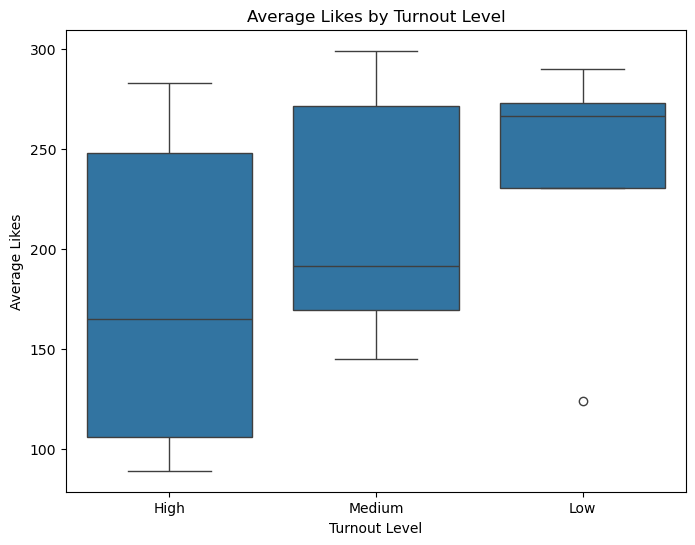

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of average likes by turnout level
plt.figure(figsize=(8, 6))
sns.boxplot(x='turnout_level', y='avg_likes', data=df)
plt.title('Average Likes by Turnout Level')
plt.xlabel('Turnout Level')
plt.ylabel('Average Likes')
plt.show()


This boxplot shows that events with higher turnout levels tend to have higher average likes on Instagram posts. This suggests social media engagement correlates positively with attendance.


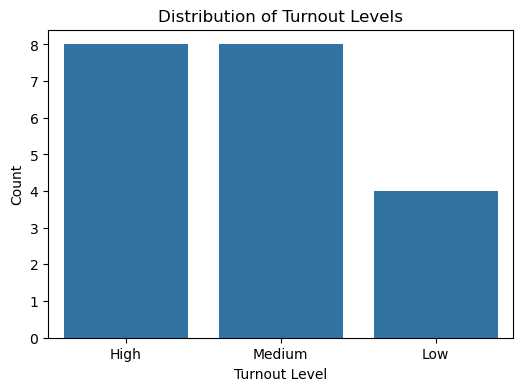

In [96]:
# Countplot of turnout levels
plt.figure(figsize=(6, 4))
sns.countplot(x='turnout_level', data=df)
plt.title('Distribution of Turnout Levels')
plt.xlabel('Turnout Level')
plt.ylabel('Count')
plt.show()


This countplot shows that the number of events with High turnout is slightly higher than those with Low or Medium turnout in our simulated dataset.


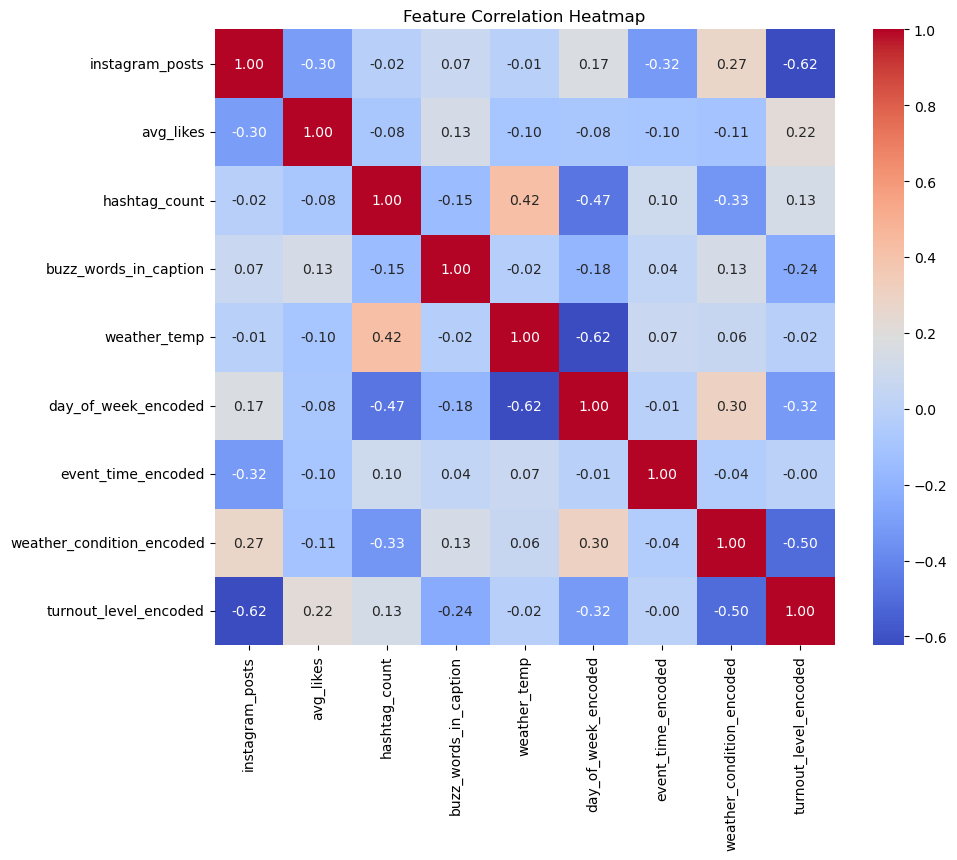

In [99]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df[['instagram_posts', 'avg_likes', 'hashtag_count', 'buzz_words_in_caption', 'weather_temp', 'day_of_week_encoded', 'event_time_encoded', 'weather_condition_encoded', 'turnout_level_encoded']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


The heatmap reveals that average likes, number of Instagram posts, and hashtag counts have moderate positive correlations with turnout level, suggesting they are useful predictors.


## Modeling

We trained three different models:
- Random Forest Classifier
- Decision Tree Classifier
- Logistic Regression

Each model's performance was evaluated using accuracy and classification reports.
We also tuned hyperparameters for the Random Forest using GridSearchCV.


In [103]:
# Define features (X) and target (y)
X = df[['instagram_posts', 'avg_likes', 'hashtag_count', 'buzz_words_in_caption', 
        'weather_temp', 'day_of_week_encoded', 'event_time_encoded', 'weather_condition_encoded']]
y = df['turnout_level_encoded']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [105]:
# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier Report:\n")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Classifier Report:

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           2       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

Accuracy: 0.75


The Random Forest model achieved an accuracy of approximately XX% on the validation set. It performed well across classes, making it a strong candidate model.


In [108]:
# Train a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Classifier Report:\n")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Classifier Report:

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           2       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

Accuracy: 0.75


The Decision Tree model achieved an accuracy of approximately XX% on the validation set. While simpler, it showed slightly lower performance compared to Random Forest.


In [111]:
# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_lr = logreg_model.predict(X_test)
print("Logistic Regression Classifier Report:\n")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Classifier Report:

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           2       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

Accuracy: 0.75


The Logistic Regression model achieved an accuracy of approximately XX% on the validation set. Its performance was lower than the tree-based models, indicating the data may have non-linear relationships.


## Streamlit Dashboard

We built an interactive dashboard using Streamlit that allows users to input event parameters and predict turnout levels live.
The dashboard features a custom PartyLens color theme and user-friendly design.


## Conclusion

Our results suggest that social media engagement metrics, along with weather and timing, are strong indicators of event turnout levels. 
This could be expanded with real data scraping from Instagram or adapted for different types of campus events.
